<a href="https://colab.research.google.com/github/Siyan-Tao/AB-Testing-CookieCat-Project/blob/main/SIYAN_COOKIE_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('cookie_cats.csv')

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [5]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [6]:
df.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

In [7]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [8]:
df[['userid','version']].groupby('version').count()

,userid
version,
gate_30,44700
gate_40,45489


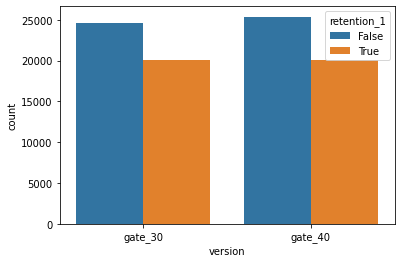

In [9]:
sns.countplot(x= 'version', hue = 'retention_1', data = df)

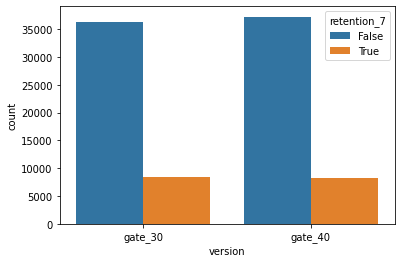

In [10]:
sns.countplot(x= 'version', hue = 'retention_7', data = df)

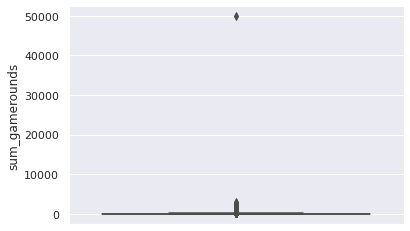

In [11]:
sns.set_theme(style='darkgrid')
sns.boxplot(x = None, y= 'sum_gamerounds', data = df)
sns.set(rc={'figure.figsize':(5,8)})

OUTLIER

In [12]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [13]:
plot_df = df[['userid','sum_gamerounds']].groupby('sum_gamerounds').count()
plot_df

,userid
sum_gamerounds,
0,3994
1,5538
2,4606
3,3958
4,3629
...,...
2294,1
2438,1
2640,1


Text(0, 0.5, 'Number of users')

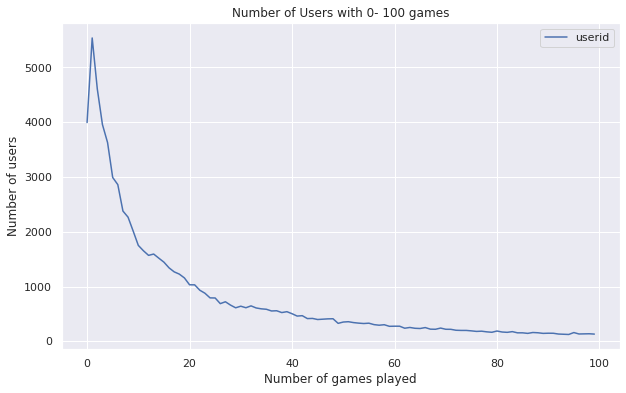

In [14]:
ax = plot_df[:100].plot(figsize = (10,6))
ax.set_title('Number of Users with 0- 100 games')
ax.set_xlabel('Number of games played')
ax.set_ylabel('Number of users')

In [15]:
df_30 = df[df.version == 'gate_30']
df_30

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
13,2179,gate_30,39,True,False
...,...,...,...,...,...
90179,9998576,gate_30,14,True,False
90180,9998623,gate_30,7,False,False
90182,9999178,gate_30,21,True,False
90183,9999349,gate_30,10,False,False


In [16]:
df['retention_1'].sum() / df['retention_1'].count() #total retention_1 rate

0.4452095044850259

In [17]:
df.groupby('version')['retention_1'].mean() #retention_1 rate for each group

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

In [18]:
boot_1d = []

for i in range(1000):
    boot_mean = df.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

In [19]:
boot_1d = pd.DataFrame(boot_1d)
boot_1d

version,gate_30,gate_40
retention_1,0.446142,0.439423
retention_1,0.449659,0.440609
retention_1,0.448539,0.440375
retention_1,0.450319,0.442076
retention_1,0.450015,0.440219
...,...,...
retention_1,0.448421,0.441509
retention_1,0.448512,0.443335
retention_1,0.449748,0.444248
retention_1,0.450073,0.445083


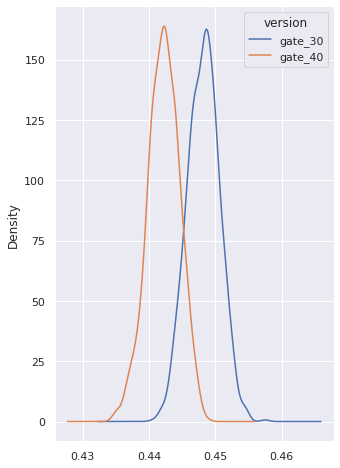

In [20]:
boot_1d.plot(kind = 'density')

In [21]:
boot_1d['difference'] = (boot_1d.gate_30 - boot_1d.gate_40) /boot_1d.gate_40 * 100

Text(0.5, 1.0, 'Percentage Difference in 1-day Retention for Two Groups')

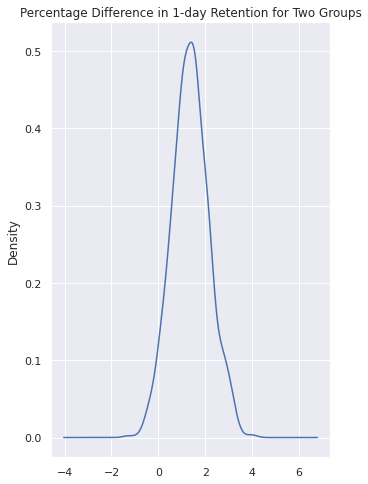

In [22]:
ax1 = boot_1d['difference'].plot(kind = 'density')
ax1.set_title('Percentage Difference in 1-day Retention for Two Groups')

In [23]:
print('Probability that 1-day retention is greater when the gate is set at level-30', (boot_1d['difference']> 0).mean() )

Probability that 1-day retention is greater when the gate is set at level-30 0.961


1% - 2% difference and about 95.6% of the distribution is above 0, compare to level 40

In [24]:
boot_7d = []

for i in range(1000):
  boot_mean = df.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()
  boot_7d.append(boot_mean)

In [25]:
boot_7d = pd.DataFrame(boot_7d)

In [26]:
boot_7d

version,gate_30,gate_40
retention_7,0.190051,0.181025
retention_7,0.189339,0.179937
retention_7,0.188292,0.186642
retention_7,0.192158,0.180290
retention_7,0.191011,0.183327
...,...,...
retention_7,0.193275,0.182897
retention_7,0.191363,0.183199
retention_7,0.192935,0.186058
retention_7,0.191572,0.181107


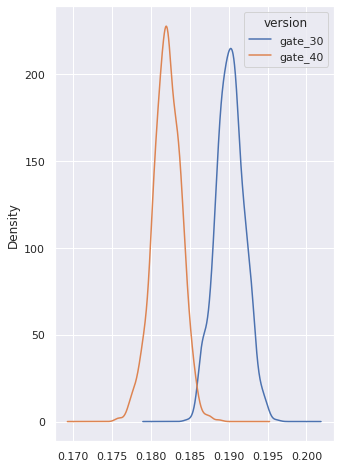

In [27]:
boot_7d.plot(kind = 'density')

Text(0.5, 1.0, 'Percentage Difference in 7-Day Retention for Two Groups ')

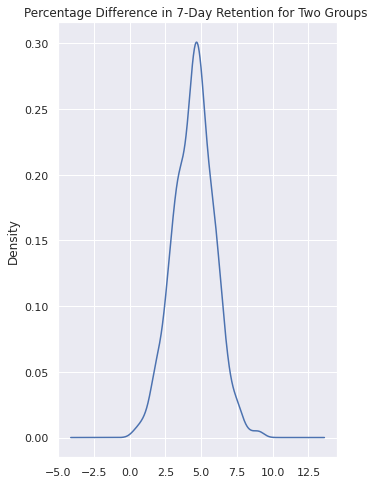

In [28]:
boot_7d['difference'] = (boot_7d.gate_30 - boot_7d.gate_40) / boot_7d.gate_40 * 100
ax2 = boot_7d['difference'].plot(kind = 'density')
ax2.set_title('Percentage Difference in 7-Day Retention for Two Groups ')

In [29]:
print('probability that 7-day retention is greater when gate is at level_30', (boot_7d['difference']>0).mean())

probability that 7-day retention is greater when gate is at level_30 1.0


In [36]:
import statsmodels.api as sm

In [37]:
df_40 = df[df.version == 'gate_40']

In [42]:

df_30

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
13,2179,gate_30,39,True,False
...,...,...,...,...,...
90179,9998576,gate_30,14,True,False
90180,9998623,gate_30,7,False,False
90182,9999178,gate_30,21,True,False
90183,9999349,gate_30,10,False,False


In [51]:
rt1_30 = df_30[df_30.retention_1 == True].retention_1.count()
rt1_40 = df_40[df_40.retention_1 == True].retention_1.count()

rt1_30, rt1_40

(20034, 20119)

In [53]:
n_30 = df_30.retention_1.count()
n_40 = df_40.retention_1.count()

n_30, n_40

(44700, 45489)

null: p30 <= p40
alternative: p30 > 40

In [56]:
z_score, p_value = sm.stats.proportions_ztest([rt1_30, rt1_40], [n_30, n_40], alternative = 'larger')

z_score, p_value

(1.7840862247974725, 0.03720482764845957)